In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day14/AirPassengers.csv")
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


Additive Seasonal HW

In [33]:
# Additive Seasonal HW with parameters
y_train = df['Passengers'][:-12]
y_test = df['Passengers'][-12:]
alpha, beta, gamma = 0.3, 0.03, 0.7
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')

#without smoothing parameters
#fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

#with auto tuning
fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

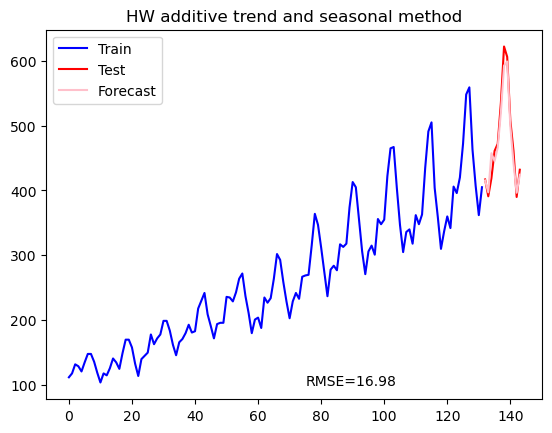

In [34]:
#plotting additve and seasonal method
y_train.plot(color='blue', label='Train')
y_test.plot(color='red', label='Test')
fcast1.plot(color='pink', label='Forecast')
error = round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(75, 100, "RMSE="+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc='best')
plt.show()

In [ ]:
#RMSE (with params) : 15.59  # alpha, beta, gamma = 0.3, 0.03, 0.7
#RMSE (without params) : 16.98  

Multiplicative Seasonal HW

In [64]:
# Multiplicative Seasonal HW with parameters
y_train = df['Passengers'][:-12]
y_test = df['Passengers'][-12:]
alpha, beta, gamma = 0.1, 0.95, 0.3
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')

#without smoothing parameters
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

#with auto tuning
#fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

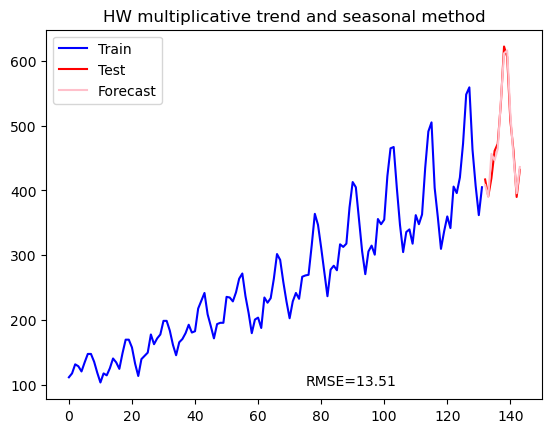

In [65]:
#plotting additve and seasonal method
y_train.plot(color='blue', label='Train')
y_test.plot(color='red', label='Test')
fcast1.plot(color='pink', label='Forecast')
error = round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(75, 100, "RMSE="+str(error))
plt.title("HW multiplicative trend and seasonal method")
plt.legend(loc='best')
plt.show()

In [ ]:
#RMSE (with params) : 15.4  # alpha, beta, gamma = 0.9, 0.02, 0.2
#RMSE (with params) : 13.51  # alpha, beta, gamma = 0.1, 0.95, 0.3
#RMSE (without params) : 15.81

Holt's Linear Trend

In [84]:
alpha= 1
beta = 0.7

#linear
ses = Holt(y_test)
fit1 = ses.fit(smoothing_level = alpha, smoothing_trend = beta)
fcast1 = fit1.forecast(len(y_test))

C:\ProgramData\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


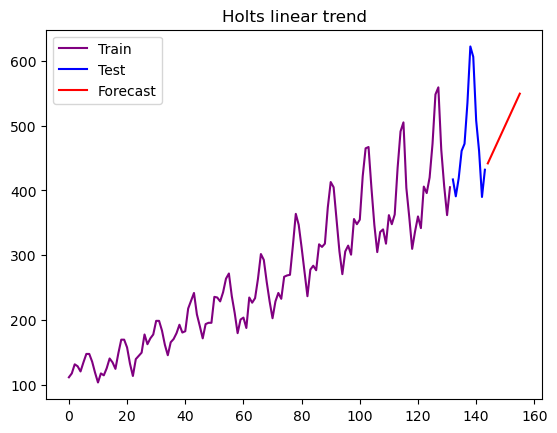

In [85]:
#plot
y_train.plot(color='purple', label='Train')
y_test.plot(color='blue', label='Test')
fcast1.plot(color='red', label='Forecast')
plt.title("Holts linear trend")
plt.legend(loc='best')
plt.show()

In [86]:
print("RMSE= ", np.sqrt(mean_squared_error(y_test, fcast1)))

RMSE=  78.0713016787449


In [ ]:
#RMSE=  78.0713016787449,  alpha= 1 , beta = 0.7

Holt's Exponential Trend

In [120]:
ses = Holt(y_train, exponential= True)
#for not auto tune
alpha= 0.9
beta = 0.7
fit1 = ses.fit(smoothing_level = alpha, smoothing_trend = beta)

#for auto tune
#fit1 = ses.fit()
fcast1 = fit1.forecast(len(y_test))

C:\ProgramData\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


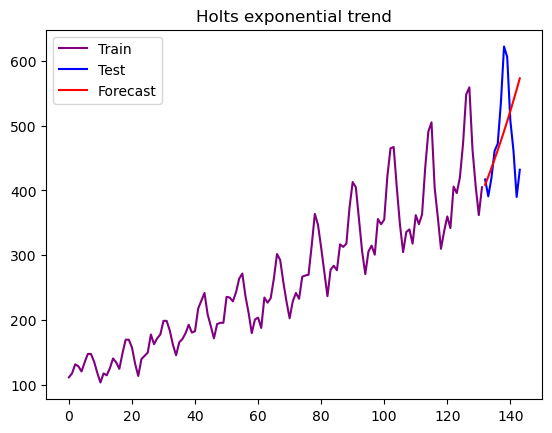

In [121]:
#plot
y_train.plot(color='purple', label='Train')
y_test.plot(color='blue', label='Test')
fcast1.plot(color='red', label='Forecast')
plt.title("Holts exponential trend")
plt.legend(loc='best')
plt.show()

In [122]:
print("RMSE= ", np.sqrt(mean_squared_error(y_test, fcast1)))

RMSE=  84.35274175935244


In [ ]:
#RMSE=  84.35274175935244,  alpha= 0.9 , beta = 0.7